In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sms
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
homes = pd.read_csv('homes.csv')
homes

,ID,Price,Floor,Lot,Bath,Bed,BathBed,Year,Age,AgeSq,Gar,Status,DAc,School,DEd,DHa,DAd,DCr,DPa
0,1,388.0,2.180,4,3.0,4,12.0,1940,-3.0,9.00,0,Sold,0,Edison,1,0,0,0,0
1,2,450.0,2.054,5,3.0,4,12.0,1957,-1.3,1.69,2,Sold,0,Edison,1,0,0,0,0
2,3,386.0,2.112,5,2.0,4,8.0,1955,-1.5,2.25,2,Sold,0,Edison,1,0,0,0,0
3,4,350.0,1.442,6,1.0,2,2.0,1956,-1.4,1.96,1,Active,1,Adams,0,0,1,0,0
4,5,155.5,1.800,1,2.0,4,8.0,1994,2.4,5.76,1,Sold,0,Adams,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,249.9,2.081,5,2.1,4,8.4,1970,0.0,0.00,1,Sold,0,Harris,0,1,0,0,0
72,73,215.0,2.044,1,1.1,4,4.4,1936,-3.4,11.56,0,Sold,0,Parker,0,0,0,0,1
73,74,435.0,2.253,11,2.0,3,6.0,1979,0.9,0.81,2,Sold,0,Redwood,0,0,0,0,0
74,75,274.9,1.861,4,2.0,4,8.0,1995,2.5,6.25,2,Active,1,Parker,0,0,0,0,1


In [3]:
test = pd.get_dummies(homes, columns=['Status'], prefix = ['Dummy'])

In [4]:
test

,ID,Price,Floor,Lot,Bath,Bed,BathBed,Year,Age,AgeSq,...,DAc,School,DEd,DHa,DAd,DCr,DPa,Dummy_Active,Dummy_Pending,Dummy_Sold
0,1,388.0,2.180,4,3.0,4,12.0,1940,-3.0,9.00,...,0,Edison,1,0,0,0,0,0,0,1
1,2,450.0,2.054,5,3.0,4,12.0,1957,-1.3,1.69,...,0,Edison,1,0,0,0,0,0,0,1
2,3,386.0,2.112,5,2.0,4,8.0,1955,-1.5,2.25,...,0,Edison,1,0,0,0,0,0,0,1
3,4,350.0,1.442,6,1.0,2,2.0,1956,-1.4,1.96,...,1,Adams,0,0,1,0,0,1,0,0
4,5,155.5,1.800,1,2.0,4,8.0,1994,2.4,5.76,...,0,Adams,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,249.9,2.081,5,2.1,4,8.4,1970,0.0,0.00,...,0,Harris,0,1,0,0,0,0,0,1
72,73,215.0,2.044,1,1.1,4,4.4,1936,-3.4,11.56,...,0,Parker,0,0,0,0,1,0,0,1
73,74,435.0,2.253,11,2.0,3,6.0,1979,0.9,0.81,...,0,Redwood,0,0,0,0,0,0,0,1
74,75,274.9,1.861,4,2.0,4,8.0,1995,2.5,6.25,...,1,Parker,0,0,0,0,1,1,0,0


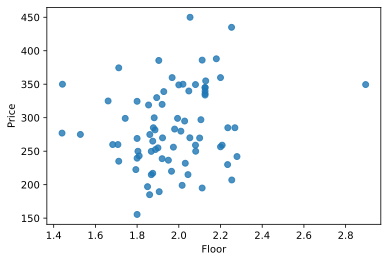

In [5]:
plt.xlabel('Floor (1000 sq ft)')
plt.ylabel('Price (1000 dollars)')

sns.regplot(x='Floor', y='Price', ci=None, fit_reg = False, data = homes)

plt.show()

In [6]:
homes = homes.drop([75])

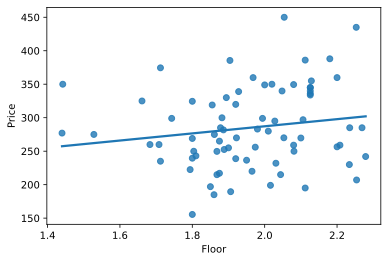

In [7]:
plt.xlabel('Floor (1000 sq ft)')
plt.ylabel('Price (1000 dollars)')

sns.regplot(x='Floor', y='Price', ci=None, fit_reg = True, data = homes)

plt.show()

Text(0, 0.5, 'Residual')

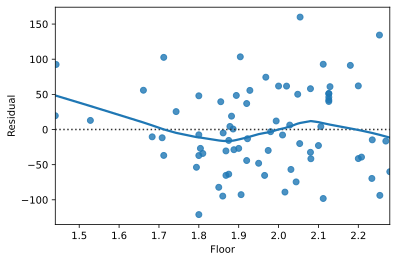

In [8]:
sns.residplot(x='Floor', y='Price', lowess=True, data=homes)
plt.ylabel('Residual')

In [9]:
homesModel1 = sms.ols('Price ~ Floor', data = homes)
homesModel1 = homesModel1.fit()

In [10]:
homesModel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.987
Date:                Fri, 15 Jul 2022   Prob (F-statistic):              0.163
Time:                        11:55:51   Log-Likelihood:                -412.34
No. Observations:                  75   AIC:                             828.7
Df Residuals:                      73   BIC:                             833.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    180.7582     74.244      2.435      0.017      32.790     328.726
Floor         53.2102     37.752      1.409      0.163     -22.030     128.451
==============================================================================
Omnibus:                        1.526   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.466   Jarque-Bera (JB):                1.564
Skew:                           0.301   Prob(JB):                        0.457
Kurtosis:                       2.629   Cond. No.                         26.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Residual')

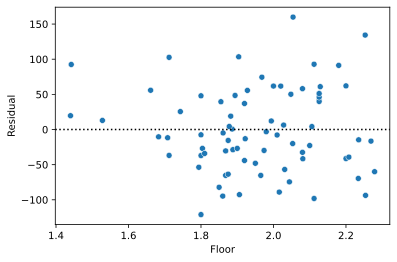

In [11]:
sns.scatterplot(x='Floor', y=homesModel1.resid, data=homes)
plt.axhline(y=0, color='black', linestyle=':')
plt.ylabel('Residual')

In [12]:
homesModel1.resid

0      91.243501
1     159.947990
2      92.861797
3      92.512647
4    -121.036613
         ...    
70    -39.246385
71    -41.588686
72    -74.519908
73    134.359155
74     -4.882437
Length: 75, dtype: float64

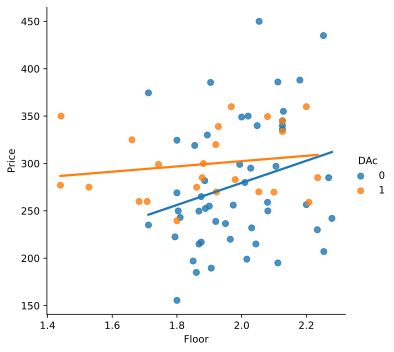

In [13]:
sns.lmplot(x='Floor', y='Price', hue='DAc', ci=None, data=homes)

In [14]:
homesModel2 = sms.ols('Price ~ Floor + DAc', data = homes)
homesModel2 = homesModel2.fit()

In [15]:
homesModel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     2.765
Date:                Fri, 15 Jul 2022   Prob (F-statistic):             0.0696
Time:                        11:55:51   Log-Likelihood:                -410.57
No. Observations:                  75   AIC:                             827.1
Df Residuals:                      72   BIC:                             834.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    138.6755     76.424      1.815      0.074     -13.673     291.024
Floor         70.1293     38.221      1.835      0.071      -6.062     146.321
DAc           27.9820     15.007      1.865      0.066      -1.934      57.898
==============================================================================
Omnibus:                        4.218   Durbin-Watson:                   1.569
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                3.956
Skew:                           0.562   Prob(JB):                        0.138
Kurtosis:                       2.945   Cond. No.                         28.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
homesModel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     2.765
Date:                Fri, 15 Jul 2022   Prob (F-statistic):             0.0696
Time:                        11:55:51   Log-Likelihood:                -410.57
No. Observations:                  75   AIC:                             827.1
Df Residuals:                      72   BIC:                             834.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    138.6755     76.424      1.815      0.074     -13.673     291.024
Floor         70.1293     38.221      1.835      0.071      -6.062     146.321
DAc           27.9820     15.007      1.865      0.066      -1.934      57.898
==============================================================================
Omnibus:                        4.218   Durbin-Watson:                   1.569
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                3.956
Skew:                           0.562   Prob(JB):                        0.138
Kurtosis:                       2.945   Cond. No.                         28.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

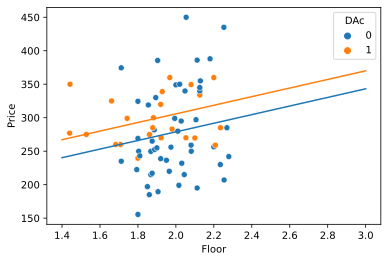

In [17]:
sns.scatterplot(x='Floor', y='Price', hue='DAc', data=homes)
x = np.linspace(1.4,3,100)
y=150.2735+64.2950*x
y1=150.2735+64.2950*x+26.8618
plt.plot(x,y)
plt.plot(x,y1)

In [18]:
homesModel3 = sms.ols('Price ~ Floor + Age + Floor*Age', data = homes).fit()

In [19]:
homesModel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     2.733
Date:                Fri, 15 Jul 2022   Prob (F-statistic):             0.0500
Time:                        11:55:51   Log-Likelihood:                -409.24
No. Observations:                  75   AIC:                             826.5
Df Residuals:                      71   BIC:                             835.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    138.5786     77.739      1.783      0.079     -16.429     293.586
Floor         73.4199     39.324      1.867      0.066      -4.991     151.831
Age          -69.0212     32.720     -2.109      0.038    -134.263      -3.779
Floor:Age     36.4094     16.434      2.215      0.030       3.641      69.178
==============================================================================
Omnibus:                        3.224   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.200   Jarque-Bera (JB):                2.893
Skew:                           0.481   Prob(JB):                        0.235
Kurtosis:                       2.976   Cond. No.                         68.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
homes['Floor'].mul(homes['Age'])

0    -6.5400
1    -2.6702
2    -3.1680
3    -2.0188
4     4.3200
       ...  
70    1.9872
71    0.0000
72   -6.9496
73    2.0277
74    4.6525
Length: 75, dtype: float64

In [21]:
homes[['Floor','Age']]

,Floor,Age
0,2.180,-3.0
1,2.054,-1.3
2,2.112,-1.5
3,1.442,-1.4
4,1.800,2.4
...,...,...
70,2.208,0.9
71,2.081,0.0
72,2.044,-3.4
73,2.253,0.9


In [22]:
homesModel4 = sms.ols('Price ~ Floor + I(Age**2) + Floor*Age', data = homes).fit()

In [23]:
homesModel4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     4.449
Date:                Fri, 15 Jul 2022   Prob (F-statistic):            0.00292
Time:                        11:55:51   Log-Likelihood:                -404.85
No. Observations:                  75   AIC:                             819.7
Df Residuals:                      70   BIC:                             831.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     159.9464     74.189      2.156      0.035      11.980     307.912
Floor          55.8572     37.821      1.477      0.144     -19.574     131.289
I(Age ** 2)     2.4937      0.845      2.951      0.004       0.808       4.179
Age           -53.2420     31.534     -1.688      0.096    -116.134       9.650
Floor:Age      30.0517     15.757      1.907      0.061      -1.374      61.478
==============================================================================
Omnibus:                       12.857   Durbin-Watson:                   1.490
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.110
Skew:                           0.871   Prob(JB):                     0.000863
Kurtosis:                       4.217   Cond. No.                         133.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""